In [178]:
import pandas
df = pandas.read_csv('https://github.com/ryurko/nflscrapR-data/raw/master/play_by_play_data/regular_season/reg_pbp_2018.csv')
pandas.options.display.max_columns = None

df.describe()



/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (42,167,168,169,170,179,180,183,184,189,190,191,192,199,200,201,202,203,204,205,206,208,210,212,227,228,229,230,231,232,233,234,235,237,238,239,241,242,250) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,lateral_sack_player_id,lateral_sack_player_name,lateral_interception_player_id,lateral_interception_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,45143.000000,4.514300e+04,43588.000000,45127.000000,45103.000000,45097.000000,45143.000000,45143.000000,45143.000000,45143.000000,37844.000000,43633.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,43619.000000,45143.000000,45143.000000,45143.000000,17669.000000,11462.000000,4815.000000,45143.000000,45143.000000,43619.000000,43619.000000,43619.000000,45143.000000,45143.000000,43363.000000,43363.000000,43363.000000,43619.000000,43619.000000,43619.000000,45043.000000,45043.000000,45043.000000,45043.000000,45043.000000,45043.000000,45043.000000,45143.000000,45143.000000,43518.000000,43294.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,17514.000000,17475.000000,43613.000000,43594.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,43271.000000,4.327100e+04,43473.000000,43473.000000,44507.000000,43199.000000,43199.000000,45143.000000,45143.000000,45143.000000,45143.000000,17497.000000,17466.000000,43596.000000,43580.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,43619.000000,43619.000000,43619.000000,43619.000000,43619.000000,43619.000000,43619.000000,43619.000000,43619.000000,45143.000000,43619.000000,43619.00000

In [179]:
# Lets add a success field

def success_func(x):
    if (x > 6):
        return 1
    else:
        return 0
  
df["success"] = df['yards_gained'].apply(success_func)
df["success"].describe()

count    45143.000000
mean         0.232218
std          0.422252
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: success, dtype: float64

In [180]:
# filter
# not the last 2 minutes of the first half
# first down
# 10 yards to go
# in the first 3 quarters
# game is within 14 points
# run plays or pass plays, removes no_play or qb_spike, any other noise
condition = (df['half_seconds_remaining'] > 120) & (df['ydstogo'] == 10) & (df['down'] == 1.0) & (df['game_seconds_remaining'] <= 15 * 60 * 3) & (df['score_differential'].abs() <= 14) & ((df['play_type'] == "run") | (df['play_type'] == "pass"))

dataset = df[condition]
dataset.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

In [185]:
#avg_success = dataset.groupby('posteam')[["success"]].mean()
#avg_success.loc["All"] = avg_success.mean()
#avg_success.sort_values(by="success", ascending = False).head(32)
success = pandas.pivot_table(dataset, values='success', index=['posteam'], columns=['down'], aggfunc=["mean"], margins=True)
success.columns = success.columns.droplevel(level=0)
success = success.drop(columns=[1.0]).rename(columns={"All": "Total Success Rate"})
success

down,Total Success Rate
posteam,
ARI,0.279503
ATL,0.376190
BAL,0.302905
BUF,0.262069
CAR,0.417722
CHI,0.255411
CIN,0.307692
CLE,0.335025
DAL,0.312217


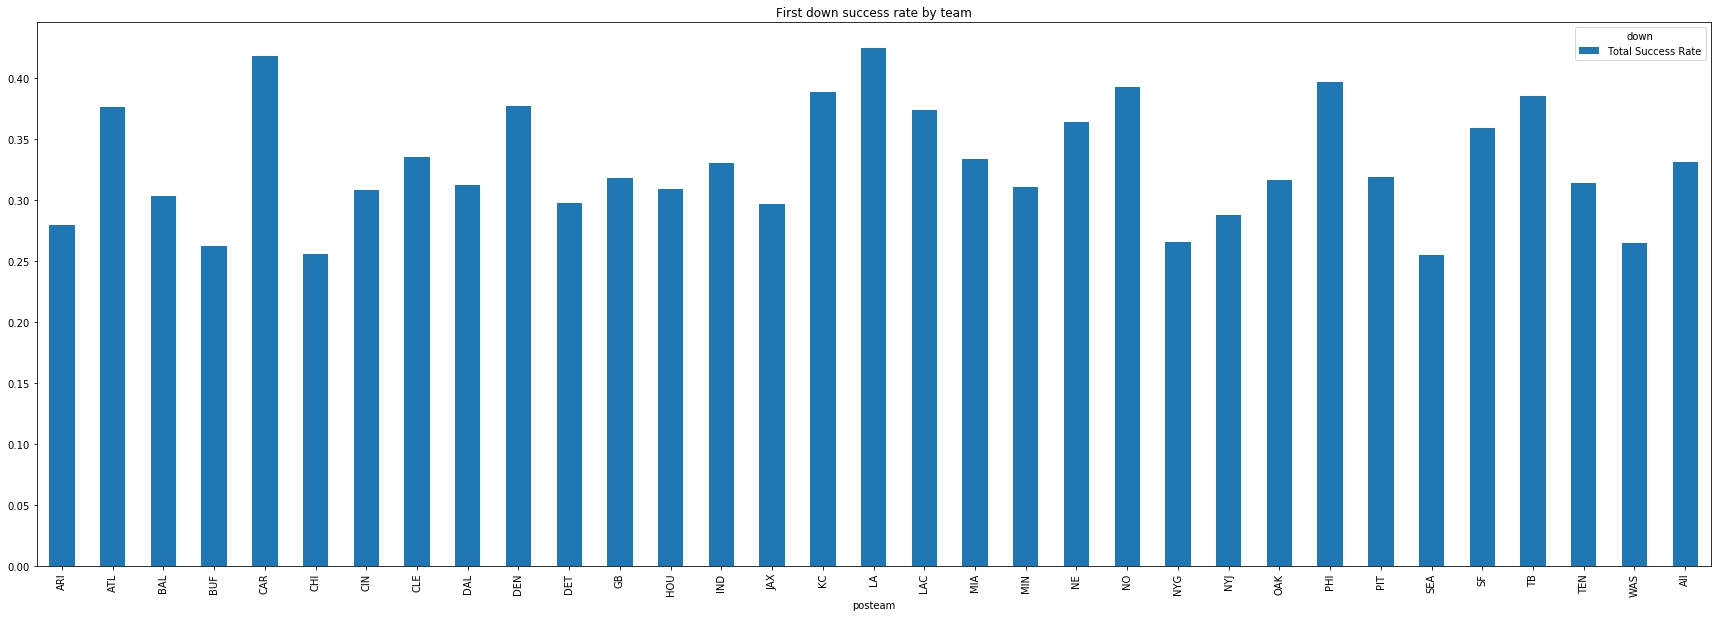

In [186]:
success.plot(kind="bar", title="First down success rate by team", figsize=(30,10))

In [200]:
success_by_playtype = pandas.pivot_table(dataset, values='success', index=['posteam'], columns=['play_type'], aggfunc=["mean","count"], margins=True)
def run_ratio(row):
    total = row["count"]["pass"] + row["count"]["run"]
    row["count"]["run"] = row["count"]["run"]/total
    row["count"]["pass"] = row["count"]["pass"]/total
    return row


success_by_playtype = success_by_playtype.apply(run_ratio, axis=1)


success_by_playtype.columns = success_by_playtype.columns.droplevel(level=0)
success_by_playtype.columns=["Pass Success Rate","Run Success Rate", "Avg Success Rate", "Pass Count %", "Run Count %", "Total Plays"]
success_by_playtype=success_by_playtype.drop(columns="Total Plays")


all_together = pandas.merge(success_by_playtype,success, right_index=True, left_index=True, how="left")

#all_together.sort_values(by="success", ascending=False)
all_together


,Pass Success Rate,Run Success Rate,Avg Success Rate,Pass Count %,Run Count %,Total Success Rate
posteam,,,,,,
ARI,0.356164,0.215909,0.279503,0.453416,0.546584,0.279503
ATL,0.464912,0.270833,0.376190,0.542857,0.457143,0.376190
BAL,0.441860,0.225806,0.302905,0.356846,0.643154,0.302905
BUF,0.345455,0.211111,0.262069,0.379310,0.620690,0.262069
CAR,0.459677,0.371681,0.417722,0.523207,0.476793,0.417722
CHI,0.352941,0.178295,0.255411,0.441558,0.558442,0.255411
CIN,0.347826,0.266667,0.307692,0.505495,0.494505,0.307692
CLE,0.387097,0.288462,0.335025,0.472081,0.527919,0.335025
DAL,0.395833,0.248000,0.312217,0.434389,0.565611,0.312217


In [ ]:
#https://github.com/ryurko/nflscrapR-data/raw/master/games_data/regular_season/reg_games_2018.csv